# Modulo 3 Actividad 3

Intención del aprendizaje esperado:

**3. Presentar información de un set de datos utilizando librería Matplotlib para graficar la información.**

Ejercicios Planteados

**Caso:**


*Se tiene un fichero csv con información relativa a datos de un estudio realizado en la zona de Boston, donde se analizan diferentes variables, como son el índice de crimen, el número de habitaciones, el porcentaje de habitantes de clase baja y el valor medio de las casas de esa zona*

Pasos:

- Importar librerías a utilizar para el caso en cuestión (panda, matplotlib)

- Leer csv correspondiente

- Renombrar campos




In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

casas = pd.read_csv('casasboston.csv')
df_casas_boston = pd.DataFrame(casas)

print(df_casas_boston)


           TOWN      LON      LAT  MEDV     CRIM    ZN  INDUS  CHAS    NOX  \
0        Nahant -70.9550  42.2550  24.0  0.00632  18.0   2.31     0  0.538   
1    Swampscott -70.9500  42.2875  21.6  0.02731   0.0   7.07     0  0.469   
2    Swampscott -70.9360  42.2830  34.7  0.02729   0.0   7.07     0  0.469   
3    Marblehead -70.9280  42.2930  33.4  0.03237   0.0   2.18     0  0.458   
4    Marblehead -70.9220  42.2980  36.2  0.06905   0.0   2.18     0  0.458   
..          ...      ...      ...   ...      ...   ...    ...   ...    ...   
501    Winthrop -70.9860  42.2312  22.4  0.06263   0.0  11.93     0  0.573   
502    Winthrop -70.9910  42.2275  20.6  0.04527   0.0  11.93     0  0.573   
503    Winthrop -70.9948  42.2260  23.9  0.06076   0.0  11.93     0  0.573   
504    Winthrop -70.9875  42.2240  22.0  0.10959   0.0  11.93     0  0.573   
505    Winthrop -70.9825  42.2210  19.0  0.04741   0.0  11.93     0  0.573   

        RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  
0 

In [19]:
df_casas_boston.rename(columns={'TOWN' : 'Localidad', 'CRIM' : 'Indice Criminalidad', 'RM' : 'Prom. Habitaciones', 'CHAS' : 'Costanera Río', 'MEDV' : 'Valor Medio Vivienda',
                                'AGE' : 'Edad', 'PTRATIO' : 'Colegios por Localidad', 'NOX' : 'Concentracion Óxidos Nítricos'}, inplace=True)
df_casas_boston


,Localidad,LON,LAT,Valor Medio Vivienda,Indice Criminalidad,ZN,INDUS,Costanera Río,Concentracion Óxidos Nítricos,Prom. Habitaciones,Edad,DIS,RAD,TAX,Colegios por Localidad,B,LSTAT
0,Nahant,-70.9550,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.9500,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.9360,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.9280,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.9220,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,-70.9860,42.2312,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,Winthrop,-70.9910,42.2275,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,Winthrop,-70.9948,42.2260,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,Winthrop,-70.9875,42.2240,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


- Confeccionar los siguientes gráficos.  Para cada gráfico debe generar la correcta interpretación para lectura de cualquier persona, esto es, no use términos técnicos

     **Histograma:** Un histograma es útil para ver la distribución de una variable, es decir, nos permite ver los valores más comunes. 
     Para el caso que se presenta se desea ver la distribución de la cantidad media de habitaciones en el estudio realizado.



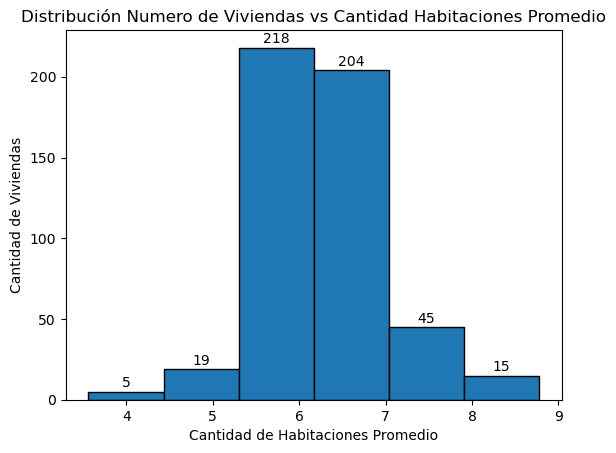

In [44]:

# Crear el histograma
n, bins, patches = plt.hist(df_casas_boston['Prom. Habitaciones'], bins=6, edgecolor='black')

# Ancho del bin
width = bins[1] - bins[0]

# Añadir la cantidad total/frecuencia a cada bin
for i in range(len(n)):
    plt.text(bins[i] + width/2, n[i] + 1, str(int(n[i])), ha='center', va='bottom')
# Títulos y etiquetas
plt.title('Distribución Numero de Viviendas vs Cantidad Habitaciones Promedio')
plt.xlabel('Cantidad de Habitaciones Promedio')
plt.ylabel('Cantidad de Viviendas')

# Mostrar el histograma
plt.show()


 **Dispersión:** sirve para representar la relación entre dos variables. Para nuestro caso se desea ver la relación entre índice de crimen y el valor mediano de las casas. En otras palabras, ¿el índice de crimen afecta el valor medio de las casas?

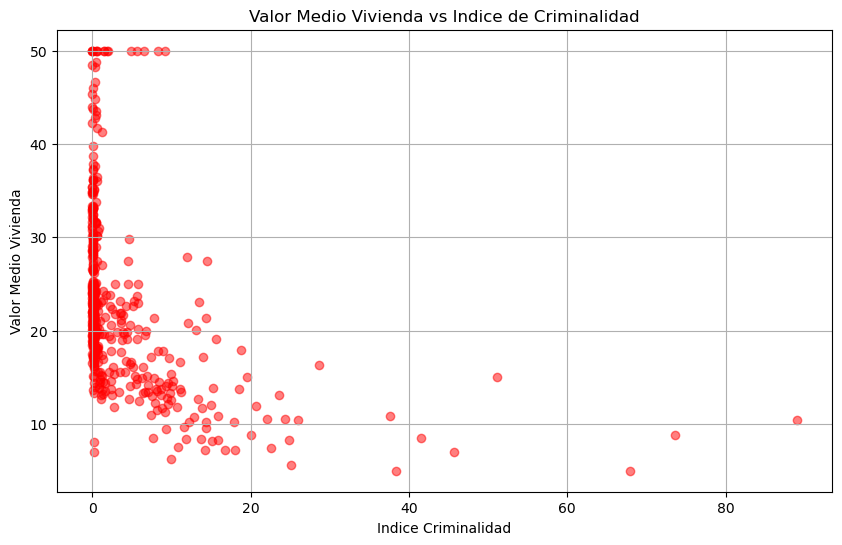

In [47]:
indice_criminalidad = df_casas_boston['Indice Criminalidad']
valor_medio_vivienda = df_casas_boston['Valor Medio Vivienda']

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico (opcional)
plt.scatter(indice_criminalidad, valor_medio_vivienda, c='red', alpha=0.5)  # c es el color, alpha es la transparencia

# Títulos y etiquetas
plt.title('Valor Medio Vivienda vs Indice de Criminalidad')
plt.xlabel('Indice Criminalidad')
plt.ylabel('Valor Medio Vivienda')
plt.grid(True)  # Habilitar la cuadrícula

# Mostrar el gráfico
plt.show()


**Barras:** Un gráfico de barras es útil para comparar una variable entre distintos grupos o categorías. Por ejemplo, si quisiéramos observar el valor medio de cada ciudad. Para nuestro caso se desea agrupar por ciudad y toma la media del valor mediano. Gráfica las 10 primeras ciudades.

In [52]:
df_valor_medio_ciudad = df_casas_boston.groupby('Localidad')['Valor Medio Vivienda'].mean().reset_index()

df_valor_medio_ciudad_ordenado = df_valor_medio_ciudad.sort_values(by='Valor Medio Vivienda', ascending=False)
df_valor_medio_ciudad_ordenado_10 = df_valor_medio_ciudad_ordenado.head(10)
df_valor_medio_ciudad_ordenado_10




,Localidad,Valor Medio Vivienda
30,Dover,50.000
7,Boston Beacon Hill,50.000
40,Lincoln,50.000
85,Weston,49.250
72,Sherborn,44.000
83,Wellesley,40.475
21,Brookline,38.025
3,Belmont,36.200
77,Topsfield,35.400
75,Sudbury,33.900


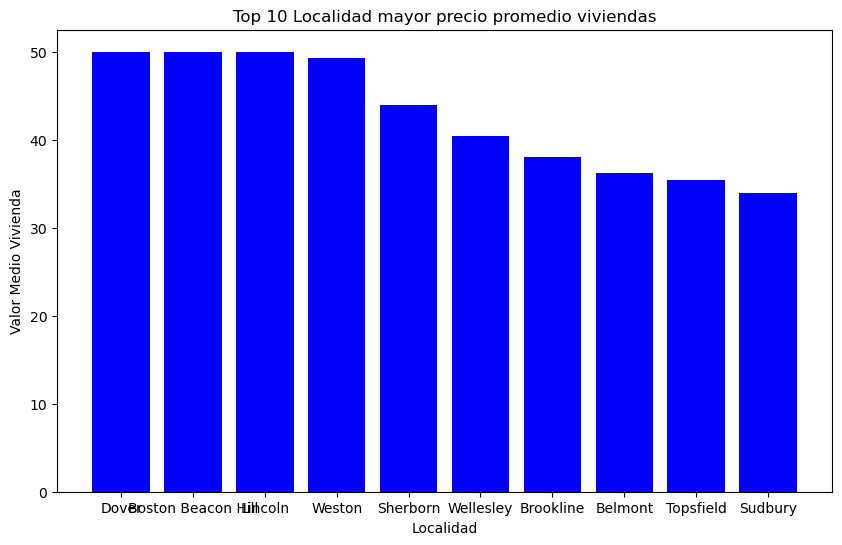

In [58]:
plt.figure(figsize=(10, 6))  # Define el tamaño del gráfico
plt.bar(df_valor_medio_ciudad_ordenado_10['Localidad'], df_valor_medio_ciudad_ordenado_10['Valor Medio Vivienda'], color='blue')  # Crea el gráfico de barras
plt.xlabel('Localidad')  # Etiqueta del eje x
plt.ylabel('Valor Medio Vivienda')  # Etiqueta del eje y
plt.title('Top 10 Localidad mayor precio promedio viviendas')  # Título del gráfico
plt.show()  # Muestra el gráfico

